# Mobile Phone Analysis

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import math
import geopandas as gpd
import folium
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
font = {'size'   : 20}
matplotlib.rc('font', **font)
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
list_ddf_createri = pd.read_csv('quake_data/list_ddf_createri.csv')

In [3]:
list_ddf_createri

,Comune,Cratere Centro Italia 2016,20150401_0000,20150401_0100,20150401_0200,20150401_0300,20150401_0400,20150401_0500,20150401_0600,20150401_0700,...,20171030_1400,20171030_1500,20171030_1600,20171030_1700,20171030_1800,20171030_1900,20171030_2000,20171030_2100,20171030_2200,20171030_2300
0,Cerreto d'Esi,1.0,11347.50,11340.50,11365.75,11408.0,11417.25,11295.50,11083.25,11051.75,...,11580.25,11727.25,11779.75,11504.75,11113.00,10960.75,11101.50,11181.00,11090.25,11036.75
1,Fabriano,1.0,127329.00,126991.75,126224.50,125018.0,123984.25,122878.50,121562.75,123230.25,...,159211.25,161687.75,164929.50,166829.25,167358.00,163644.00,158348.00,153241.25,151060.00,147807.25
2,Acquasanta Terme,1.0,13079.25,13167.25,13192.75,13193.0,13184.25,13064.25,12754.75,12808.75,...,12408.50,12567.25,12658.00,12498.50,12468.50,12605.50,12708.50,12656.00,12730.50,12839.75
3,Appignano del Tronto,1.0,9618.75,9663.50,9776.00,9777.5,9784.00,9667.50,9429.50,9020.25,...,8451.75,8432.00,8465.25,8599.75,9072.75,9356.00,9667.75,9822.00,9874.50,9747.00
4,Arquata del Tronto,1.0,4416.25,4372.25,4371.00,4332.0,4240.50,4152.75,4161.00,4213.00,...,4476.00,4459.25,4381.50,3746.75,2678.25,2400.75,2439.00,2008.50,1988.50,1963.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Sante Marie,0.0,52.25,52.25,53.00,54.5,54.75,55.25,54.25,52.00,...,32.00,31.75,31.25,30.75,30.75,28.75,26.50,25.00,22.25,21.00
659,Roccacasale,0.0,11.00,11.00,11.00,11.0,11.00,11.00,11.00,11.00,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
660,Montorio Romano,0.0,65.00,65.00,65.75,66.5,67.00,67.00,65.25,61.75,...,38.25,39.00,39.25,41.50,49.25,50.00,50.00,50.00,50.00,50.00
661,Manziana,0.0,8.00,8.25,9.00,9.0,9.00,9.00,9.00,8.00,...,8.00,8.25,8.75,9.00,9.00,9.00,9.00,9.25,9.25,9.00


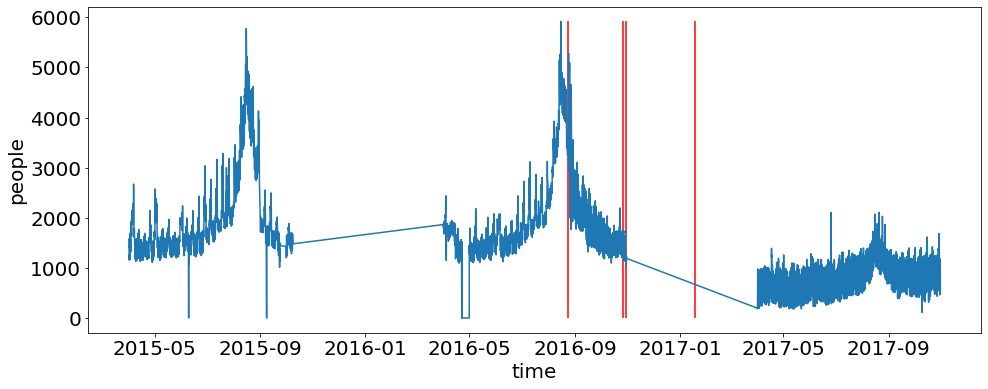

In [4]:
terr1 = datetime.strptime('2016-08-24 03:00:00','%Y-%m-%d %H:%M:%S') # Accumuli
terr2 = datetime.strptime('2016-10-26 21:00:00','%Y-%m-%d %H:%M:%S') # Castelsantangelo sul Nera
terr3 = datetime.strptime('2016-10-30 07:00:00','%Y-%m-%d %H:%M:%S') # Norcia
terr4 = datetime.strptime('2017-01-18 11:00:00','%Y-%m-%d %H:%M:%S') # Capitignano
wide = list_ddf_createri
df = list_ddf_createri.melt(id_vars=wide.columns[0:2],value_vars = wide.columns[2:])
df['datetime'] = pd.to_datetime(df['variable'], format = '%Y%m%d_%H%M')
#df['month'] = df['datetime'].dt.month
#df = df[df['month']!=10].drop('month',axis=1)
df['value'] = df['value'] / 10 * 3
df  = df.drop('variable', axis=1)
s = df[df['Comune']=='Accumoli']
plt.plot(s['datetime'], s['value'])
plt.vlines([terr1,terr2,terr3,terr4],min(s['value']),max(s['value']),colors ='#ff0000')
plt.xlabel('time')
plt.ylabel('people')
plt.savefig('images/accumoli-ts.pdf')  
plt.show()

In [5]:
df

,Comune,Cratere Centro Italia 2016,value,datetime
0,Cerreto d'Esi,1.0,3404.250,2015-04-01 00:00:00
1,Fabriano,1.0,38198.700,2015-04-01 00:00:00
2,Acquasanta Terme,1.0,3923.775,2015-04-01 00:00:00
3,Appignano del Tronto,1.0,2885.625,2015-04-01 00:00:00
4,Arquata del Tronto,1.0,1324.875,2015-04-01 00:00:00
...,...,...,...,...
9560455,Sante Marie,0.0,6.300,2017-10-30 23:00:00
9560456,Roccacasale,0.0,3.000,2017-10-30 23:00:00
9560457,Montorio Romano,0.0,15.000,2017-10-30 23:00:00
9560458,Manziana,0.0,2.700,2017-10-30 23:00:00


In [6]:
df2 = df[df['value']>0]
tot = df2.groupby(['datetime'])['value'].sum().reset_index()
agg = df2.groupby(['Cratere Centro Italia 2016','datetime'])['value'].sum().reset_index()
c0 = agg[agg['Cratere Centro Italia 2016']==0]
c1 = agg[agg['Cratere Centro Italia 2016']==1]
agg.head()

,Cratere Centro Italia 2016,datetime,value
0,0.0,2015-04-01 00:00:00,3680028.000
1,0.0,2015-04-01 01:00:00,3677260.125
2,0.0,2015-04-01 02:00:00,3672239.700
3,0.0,2015-04-01 03:00:00,3663733.350
4,0.0,2015-04-01 04:00:00,3642331.500


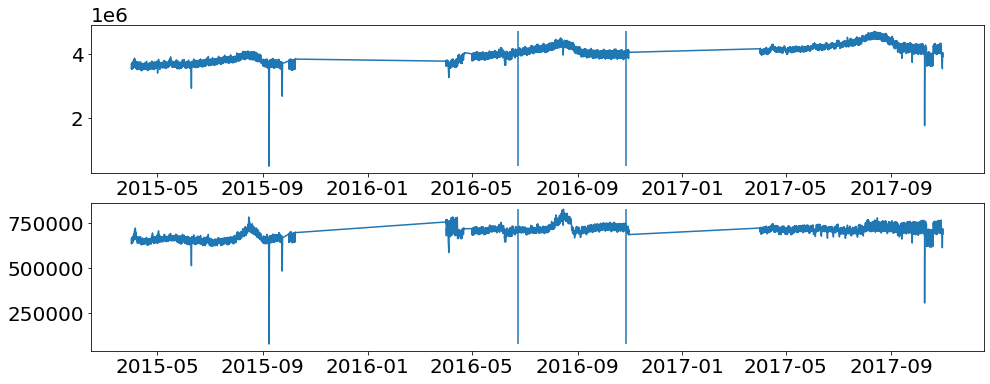

In [7]:
terr1 = datetime.strptime('2016-06-24 03:00:00','%Y-%m-%d %H:%M:%S')
terr2 = datetime.strptime('2016-10-26 21:00:00','%Y-%m-%d %H:%M:%S')
t1 = datetime.strptime('2016-06-24 03:00:00','%Y-%m-%d %H:%M:%S')
t2 = datetime.strptime('2017-12-24 03:00:00','%Y-%m-%d %H:%M:%S')
#plt.subplot(1, 3, 1)
#s = tot
#plt.plot(s['datetime'], s['value'])
#plt.vlines([terr1,terr2],min(s['value']),max(s['value']))
plt.subplot(2, 1, 1)
s = c0
plt.plot(s['datetime'], s['value'])
plt.vlines([terr1,terr2],min(s['value']),max(s['value']))
#plt.xlim(t1,t2)
plt.subplot(2, 1, 2)
s = c1
plt.plot(s['datetime'], s['value'])
plt.vlines([terr1,terr2],min(s['value']),max(s['value']))
#plt.xlim(t1,t2)
plt.show()

In [8]:

tot = df2.groupby(['datetime'])['value'].sum().reset_index()
agg = df2.groupby(['Cratere Centro Italia 2016','datetime'])['value'].sum().reset_index()
c0 = agg[agg['Cratere Centro Italia 2016']==0].drop('Cratere Centro Italia 2016',axis=1)
c1 = agg[agg['Cratere Centro Italia 2016']==1].drop('Cratere Centro Italia 2016',axis=1)

singolo = df2[df2['Comune']=='Accumoli'].drop(['Comune','Cratere Centro Italia 2016'],axis=1)
singolo = singolo[singolo['value']>0]

serie = singolo.copy()
print(serie.shape)
serie


(14196, 2)


,value,datetime
101,1246.650,2015-04-01 00:00:00
764,1221.075,2015-04-01 01:00:00
1427,1184.475,2015-04-01 02:00:00
2090,1177.200,2015-04-01 03:00:00
2753,1173.675,2015-04-01 04:00:00
...,...,...
9557246,826.950,2017-10-30 19:00:00
9557909,725.025,2017-10-30 20:00:00
9558572,678.150,2017-10-30 21:00:00
9559235,644.550,2017-10-30 22:00:00


In [9]:
def add_feature(serie):
    
    serie['year'] = serie['datetime'].dt.year - 2015
    
    #month = pd.get_dummies(serie['datetime'].dt.month, prefix='month') #one hot encoding
    #serie = pd.concat([serie,month],axis='columns')
    
    week = pd.get_dummies(serie['datetime'].dt.isocalendar().week, prefix='week') #one hot encoding
    serie = pd.concat([serie,week],axis='columns')

    day_of_week = pd.get_dummies(serie['datetime'].dt.dayofweek, prefix='day') #one hot encoding
    serie = pd.concat([serie,day_of_week],axis='columns')

    hours = pd.get_dummies(serie['datetime'].dt.hour, prefix='h') #one hot encoding
    serie = pd.concat([serie,hours],axis='columns')
    
    return serie


def fill_missing_data(serie):

    serie_init = serie.copy()

    serie = serie.append({'datetime':datetime.strptime('2015-10-14 00:00:00','%Y-%m-%d %H:%M:%S'),'value':np.nan}, ignore_index = True)
    serie = serie.append({'datetime':datetime.strptime('2015-10-21 00:00:00','%Y-%m-%d %H:%M:%S'),'value':np.nan}, ignore_index = True)
    serie = serie.append({'datetime':datetime.strptime('2015-10-28 00:00:00','%Y-%m-%d %H:%M:%S'),'value':np.nan}, ignore_index = True)
    serie = serie.sort_values(by=['datetime'])
    serie = add_feature(serie)

    model = LinearRegression()
    f = serie.columns[2:]
    model.fit(serie.dropna(axis='rows').loc[:,f], serie.dropna(axis='rows')['value'])


    yp = model.predict(serie.loc[:,f])
    serie['yp'] = yp


    addition = serie.loc[serie['value'].isna(),['yp','datetime']]
    addition.columns = ['value','datetime']
    addition

    serie_init = pd.concat([serie_init,addition])
    serie_init = serie_init.sort_values(by=['datetime'])
    serie = serie_init

    return serie


In [10]:
serie = fill_missing_data(serie)
serie = add_feature(serie)

terr1 = datetime.strptime('2016-08-24 03:00:00','%Y-%m-%d %H:%M:%S')

train = serie[serie['datetime'] < terr1]
test = serie[serie['datetime'] >= terr1]
#print(sorted(np.unique(train['datetime'].dt.isocalendar().week)))
#print(sorted(np.unique(test['datetime'].dt.isocalendar().week)))
print(train.shape)
print(test.shape)


(7554, 66)
(6645, 66)


In [11]:

model = LinearRegression()
f = serie.columns[2:]
#print(list(f))
model.fit(train.loc[:,f], train['value'])
print('coef = ',model.coef_)
print('intercept = ', model.intercept_)

coef =  [ 5.20203506e+01 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13 -5.09048262e+13
 -5.09048262e+13 -3.17643674e+14 -3.17643674e+14 -3.17643674e+14
 -3.17643674e+14 -3.17643674e+14 -3.17643674e+14 -3.17643674e+14
  4.94027091e+13  4.94027091e+13  4.94027091e+13  4.94027091e+13
  4.94027091e+13  4.94027091e+13  4.94027091e+13  4.94027091e+13
  4.94027091e+13  4.94027091e+13  4.94027091e+13  4.94027091e+13
  4.94027091e+13  4.94027091e+13  4.94027091e+13  4.94027091e+13
  4.94027091e+13  4.94027091e+13  4.94027091e+13  4.94027091e+13
  4.94027091e+13 

In [12]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#f = serie.columns[2:]
print(list(f))
#model.fit(train.loc[:,f], train['value'])

['year', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'h_0', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23']


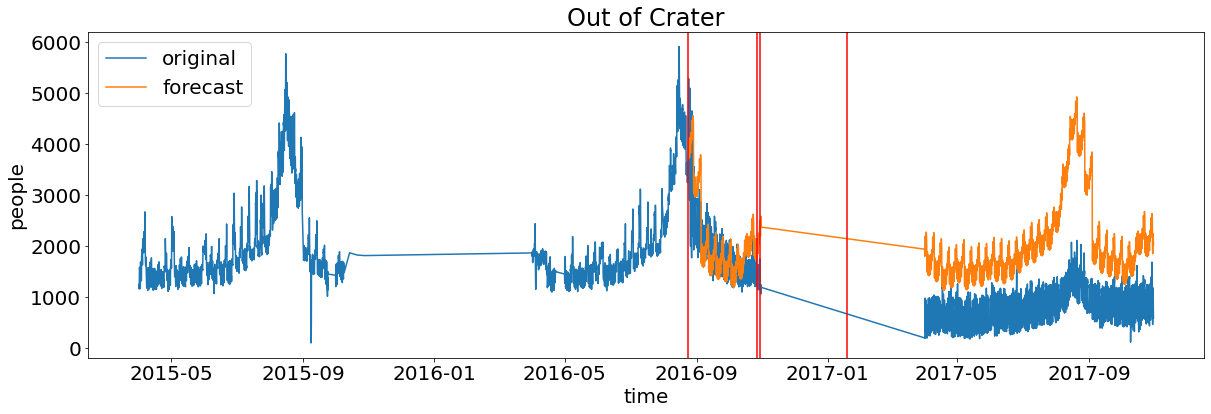

MAPE = 166.08047424266334 %
Variation =  -50.16135731665767 %
Initial Variation =  -10.301178681952232 %
Final Variation =  -62.678257390201686 %


In [13]:
yp = model.predict(test.loc[:,f])
plt.figure(figsize = (20, 6))
plt.plot(serie['datetime'],serie['value'],label='original')
plt.plot(test['datetime'],yp,label='forecast')
plt.legend(loc="best")
t1 = datetime.strptime('2015-09-24 03:00:00','%Y-%m-%d %H:%M:%S')
t2 = datetime.strptime('2015-12-29 03:00:00','%Y-%m-%d %H:%M:%S')
#plt.xlim(t1,t2)


#plt.vlines([terr1,terr2,terr3,terr4],min(test.loc[:,'value']),max(test.loc[:,'value']),colors ='#ff0000')
for t in [terr1,terr2,terr3,terr4]:
    plt.axvline(t,color='#ff0000')

plt.xlabel('time')
plt.ylabel('people')
plt.title('Out of Crater')
plt.savefig('images/accumoli-forecast.pdf',bbox_inches='tight') 
plt.show()

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE =',mean_absolute_percentage_error(test.loc[:,'value'],yp)*100,'%') 
print('Variation = ',np.mean(((test.loc[:,'value'] - yp) / yp)) * 100,'%') #non absolute

tmp = test.copy()
tmp['yp'] = yp
tmp = tmp[['datetime','value','yp']]
tmp1 = tmp.loc[tmp['datetime']<terr3,:]
tmp2 = tmp.loc[tmp['datetime']>=terr3,:]
print('Initial Variation = ',np.mean(((tmp1.loc[:,'value'] - tmp1.loc[:,'yp']) / tmp1.loc[:,'yp'])) * 100,'%') #non absolute
print('Final Variation = ',np.mean(((tmp2.loc[:,'value'] - tmp2.loc[:,'yp']) / tmp2.loc[:,'yp'])) * 100,'%') #non absolute

# Forecasting On Every Municipality

In [50]:

# Apply the bove procedure on every municipality

nome_comune =  []
cratere = []
variaz = []
variaz_init = []
variaz_final = []

comuni = list(np.unique(df2['Comune']))
for i in range(len(comuni)):
    print(comuni[i],i,'/',len(comuni))
    singolo = df2[df2['Comune']==comuni[i]]
    crat = int(singolo['Cratere Centro Italia 2016'].iloc[0])
    singolo = singolo[singolo['value']>0].drop(['Comune','Cratere Centro Italia 2016'],axis=1)
    serie = singolo.copy()
    serie = fill_missing_data(serie)
    serie = add_feature(serie)

    terr1 = datetime.strptime('2016-08-24 03:00:00','%Y-%m-%d %H:%M:%S')

    train = serie[serie['datetime'] < terr1]
    test = serie[serie['datetime'] >= terr1]
    
    #model = DecisionTreeRegressor()
    model = LinearRegression()
    f = serie.columns[2:]
    model.fit(train.loc[:,f], train['value'])
    yp = model.predict(test.loc[:,f])
    #print('MAPE =',mean_absolute_percentage_error(test.loc[:,'value'],yp)*100,'%') 
    c = np.mean(((test.loc[:,'value'] - yp) / yp)) * 100
    
    tmp = test.copy()
    tmp['yp'] = yp
    tmp = tmp[['datetime','value','yp']]
    tmp1 = tmp.loc[tmp['datetime']<terr3,:]
    tmp2 = tmp.loc[tmp['datetime']>=terr3,:]
    c_init = np.mean(((tmp1.loc[:,'value'] - tmp1.loc[:,'yp']) / tmp1.loc[:,'yp'])) * 100
    c_end = np.mean(((tmp2.loc[:,'value'] - tmp2.loc[:,'yp']) / tmp2.loc[:,'yp'])) * 100
    

    #print('Calo = ',c,'%') #non absolute
    nome_comune.append(comuni[i])
    cratere.append(crat)
    variaz.append(c)
    variaz_init.append(c_init)
    variaz_final.append(c_end)
variaz_df = pd.DataFrame({'Comune':nome_comune,'Cratere Centro Italia 2016':cratere,'Variaz':variaz,'Variaz_init':variaz_init,'Variaz_end':variaz_final})
variaz_df

Abbateggio 0 / 663
Acciano 1 / 663
Accumoli 2 / 663
Acquacanina 3 / 663
Acqualagna 4 / 663
Acquapendente 5 / 663
Acquasanta Terme 6 / 663
Acquasparta 7 / 663
Acquaviva Picena 8 / 663
Agugliano 9 / 663
Alanno 10 / 663
Alba Adriatica 11 / 663
Allerona 12 / 663
Allumiere 13 / 663
Altidona 14 / 663
Alviano 15 / 663
Amandola 16 / 663
Amatrice 17 / 663
Amelia 18 / 663
Ancarano 19 / 663
Ancona 20 / 663
Anghiari 21 / 663
Antrodoco 22 / 663
Apecchio 23 / 663
Apiro 24 / 663
Appignano 25 / 663
Appignano del Tronto 26 / 663
Arcevia 27 / 663
Arezzo 28 / 663
Ari 29 / 663
Arielli 30 / 663
Arlena di Castro 31 / 663
Arquata del Tronto 32 / 663
Arrone 33 / 663
Arsita 34 / 663
Ascoli Piceno 35 / 663
Ascrea 36 / 663
Assisi 37 / 663
Atri 38 / 663
Attigliano 39 / 663
Avigliano Umbro 40 / 663
Badia Tedalda 41 / 663
Bagnoregio 42 / 663
Barbara 43 / 663
Barbarano Romano 44 / 663
Barchi 45 / 663
Barete 46 / 663
Barisciano 47 / 663
Baschi 48 / 663
Basciano 49 / 663
Bassano Romano 50 / 663
Bassano in Teverina 51 

Montefranco 368 / 663
Montegabbione 369 / 663
Montegallo 370 / 663
Montegiorgio 371 / 663
Montegranaro 372 / 663
Monteleone Sabino 373 / 663
Monteleone d'Orvieto 374 / 663
Monteleone di Fermo 375 / 663
Monteleone di Spoleto 376 / 663
Montelibretti 377 / 663
Montelparo 378 / 663
Montelupone 379 / 663
Montemaggiore al Metauro 380 / 663
Montemarciano 381 / 663
Montemonaco 382 / 663
Montenero Sabino 383 / 663
Monteprandone 384 / 663
Montepulciano 385 / 663
Monterchi 386 / 663
Montereale 387 / 663
Monterosi 388 / 663
Monterubbiano 389 / 663
Montesilvano 390 / 663
Montone 391 / 663
Montopoli di Sabina 392 / 663
Montorio Romano 393 / 663
Montorio al Vomano 394 / 663
Montottone 395 / 663
Moresco 396 / 663
Morlupo 397 / 663
Morro Reatino 398 / 663
Morro d'Alba 399 / 663
Morro d'Oro 400 / 663
Morrovalle 401 / 663
Mosciano Sant'Angelo 402 / 663
Moscufo 403 / 663
Muccia 404 / 663
Narni 405 / 663
Navelli 406 / 663
Nazzano 407 / 663
Nepi 408 / 663
Nereto 409 / 663
Nerola 410 / 663
Nespolo 411 / 663


,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end
0,Abbateggio,0,-14.463816,0.007051,-0.192272
1,Acciano,0,-14.874264,-0.046984,-0.180697
2,Accumoli,1,-50.161357,-0.103012,-0.626783
3,Acquacanina,1,-34.800125,-0.096416,-0.427004
4,Acqualagna,0,-9.518700,-0.094001,-0.095559
...,...,...,...,...,...
658,Villa Santa Lucia degli Abruzzi,0,-10.220925,-0.055542,-0.116864
659,Villamagna,0,-4.337274,0.012061,-0.060780
660,Visso,1,-39.942473,-0.185340,-0.466652
661,Viterbo,0,7.167185,0.024108,0.086608


In [52]:
variaz_df.to_csv('quake_data/variaz_phone.csv',index=False)

In [14]:
alldata_reshape = pd.read_csv('quake_data/alldata_reshape.csv')
alldata_reshape = alldata_reshape.loc[:,['Comune','pop_fine_2016']]
alldata_reshape['size'] = alldata_reshape['pop_fine_2016'] / 100
alldata_reshape

,Comune,pop_fine_2016,size
0,Acciano,319.0,3.19
1,Accumoli,639.0,6.39
2,Acquasanta Terme,2868.0,28.68
3,Acquasparta,4667.0,46.67
4,Acquaviva Picena,3793.0,37.93
...,...,...,...
380,Varco Sabino,184.0,1.84
381,Venarotta,2072.0,20.72
382,Villa Sant'Angelo,429.0,4.29
383,Villa Santa Lucia degli Abruzzi,111.0,1.11


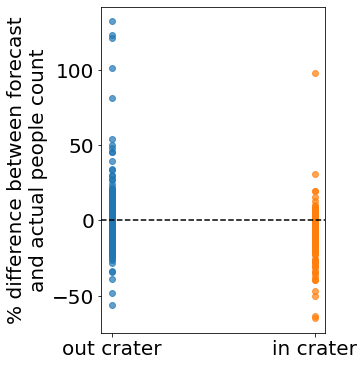

Mean out crater -0.014972323711630188
Mean in crater -10.228030222557251


,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end,pop_fine_2016,size
count,126.0,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1.0,-10.228030,-3.236829,-12.423408,4189.349206,41.893492
std,0.0,18.161322,9.096977,22.331660,9190.123637,91.901236
min,1.0,-64.825561,-38.635600,-74.012467,114.000000,1.140000
25%,1.0,-17.782778,-7.886654,-21.638403,654.500000,6.545000
50%,1.0,-9.302193,-1.549212,-11.958453,1288.000000,12.880000
75%,1.0,-1.805165,2.889816,-2.748690,2847.250000,28.472500
max,1.0,97.940609,16.002083,128.928181,54870.000000,548.700000


In [15]:
variaz = pd.read_csv('quake_data/variaz_phone.csv', sep=',')
variaz_df2 = pd.merge(variaz, alldata_reshape, how='inner', on='Comune')
#variaz_df2 = variaz_df2.loc[variaz_df2['pop_fine_2016']>1000,:]

v0 = variaz_df2[variaz_df2['Cratere Centro Italia 2016']==0]
v1 = variaz_df2[variaz_df2['Cratere Centro Italia 2016']==1]

plt.figure(figsize = (4, 6))
plt.scatter([0]*v0.shape[0],v0['Variaz'],alpha=0.7)
plt.scatter([1]*v1.shape[0],v1['Variaz'],alpha=0.7)
#plt.boxplot([v0['Variaz'],v1['Variaz']],positions=[0,1])
plt.xticks([0,1],['out crater','in crater']) 
plt.axhline(y = 0, color = '#000000', linestyle = 'dashed')
plt.ylabel('% difference between forecast\nand actual people count',multialignment='center')
plt.savefig('images/all-forecast.pdf',bbox_inches='tight')  
plt.show()

print('Mean out crater',v0['Variaz'].mean())
print('Mean in crater',v1['Variaz'].mean())
v1.describe()

In [16]:
variaz_df2.loc[variaz_df2['Cratere Centro Italia 2016']==0,:].loc[variaz_df2['Variaz']<-20,:]

,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end,pop_fine_2016,size
21,Ascrea,0,-21.084282,-19.434693,-21.602286,257.0,2.57
60,Carassai,0,-20.909497,-13.298536,-23.299492,1092.0,10.92
67,Castel Ritaldi,0,-20.002490,0.241905,-26.359639,3253.0,32.53
72,Castel di Tora,0,-33.341503,-18.891544,-37.879082,285.0,2.85
78,Castelvecchio Calvisio,0,-23.825218,-14.895189,-26.629427,145.0,1.45
84,Celano,0,-25.538245,-18.603758,-27.715814,10868.0,108.68
109,Concerviano,0,-22.116194,-12.031065,-25.283128,286.0,2.86
128,Fano Adriano,0,-26.634729,-18.100054,-29.314789,286.0,2.86
144,Frasso Sabino,0,-28.546822,-26.636292,-29.146766,749.0,7.49
164,Longone Sabino,0,-22.149744,-6.394332,-27.097261,580.0,5.80


# Compare with Official Census Data

In [59]:
from datetime import datetime
t = datetime.strptime('2016-08-24 03:00:00','%Y-%m-%d %H:%M:%S')
df['hour'] = df['datetime'].dt.hour
df2 = df[df['hour'].isin([22,23,0,1,2,3,4,5])]

In [60]:
pre = df2[df2['datetime'] < t]
post = df2[df2['datetime'] > t]
m_pre = pre.groupby(['Comune','Cratere Centro Italia 2016'])['value'].mean().reset_index()
m_pre = m_pre.rename(columns={'value':'media_prima'})
m_post = post.groupby(['Comune','Cratere Centro Italia 2016'])['value'].mean().reset_index()
m_post = m_post.rename(columns={'value':'media_dopo'})
m = pd.concat([m_pre,m_post],axis='columns')
m = m.iloc[:,[0,1,2,5]]
m['varPhones'] = (m['media_dopo'] - m['media_prima']) / m['media_prima']
medie_prima_dopo = m
medie_prima_dopo

,Comune,Cratere Centro Italia 2016,media_prima,media_dopo,varPhones
0,Abbateggio,0.0,490.128191,528.004679,0.077279
1,Acciano,0.0,768.136868,819.775802,0.067226
2,Accumoli,1.0,1851.535702,756.245581,-0.591558
3,Acquacanina,1.0,661.076764,515.862884,-0.219663
4,Acqualagna,0.0,6232.440927,6788.446451,0.089212
...,...,...,...,...,...
658,Villa Santa Lucia degli Abruzzi,0.0,619.704165,615.334550,-0.007051
659,Villamagna,0.0,2299.570141,2671.182335,0.161601
660,Visso,1.0,3745.319302,2389.214715,-0.362080
661,Viterbo,0.0,59906.488893,70060.167213,0.169492


In [61]:
alldata_reshape = pd.read_csv('quake_data/alldata_reshape.csv')
alldata_reshape['var2016'] = (alldata_reshape['pop_fine_2016'] - alldata_reshape['pop_iniz_2016']) / (alldata_reshape['pop_iniz_2016']) 
alldata_reshape['var2017'] = (alldata_reshape['pop_fine_2017'] - alldata_reshape['pop_iniz_2017']) / (alldata_reshape['pop_iniz_2017'])  
alldata_reshape['var2017all'] = (alldata_reshape['pop_fine_2017'] - alldata_reshape['pop_iniz_2016']) / (alldata_reshape['pop_iniz_2016'])  
alldata_reshape['delta2016'] = (alldata_reshape['iscr2016'] - alldata_reshape['canc2016']) / (alldata_reshape['pop_fine_2016']) 
alldata_reshape['delta2017'] = (alldata_reshape['iscr2017'] - alldata_reshape['canc2017']) / (alldata_reshape['pop_fine_2017']) 
alldata_reshape.replace([np.inf, -np.inf], np.nan, inplace=True)
k = ['Comune']+list(alldata_reshape.columns[-6:])
alldata_reshape

,Comune,canc2015,canc2016,canc2017,iscr2015,iscr2016,iscr2017,pop_iniz_2015,pop_iniz_2016,pop_iniz_2017,pop_fine_2015,pop_fine_2016,pop_fine_2017,Cratere Centro Italia 2016,var2016,var2017,var2017all,delta2016,delta2017
0,Acciano,11.0,21.0,10.0,9.0,19.0,12.0,347.0,335.0,319.0,335.0,319.0,317.0,0.0,-0.047761,-0.006270,-0.053731,-0.006270,0.006309
1,Accumoli,30.0,17.0,13.0,28.0,19.0,6.0,665.0,655.0,639.0,655.0,639.0,616.0,1.0,-0.024427,-0.035994,-0.059542,0.003130,-0.011364
2,Acquasanta Terme,101.0,88.0,67.0,76.0,52.0,23.0,2994.0,2935.0,2868.0,2935.0,2868.0,2801.0,1.0,-0.022828,-0.023361,-0.045656,-0.012552,-0.015709
3,Acquasparta,173.0,142.0,126.0,136.0,130.0,147.0,4786.0,4705.0,4667.0,4705.0,4667.0,4636.0,0.0,-0.008077,-0.006642,-0.014665,-0.002571,0.004530
4,Acquaviva Picena,143.0,146.0,133.0,97.0,115.0,141.0,3878.0,3829.0,3793.0,3829.0,3793.0,3778.0,0.0,-0.009402,-0.003955,-0.013319,-0.008173,0.002118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Varco Sabino,14.0,14.0,19.0,11.0,17.0,9.0,193.0,185.0,184.0,185.0,184.0,169.0,0.0,-0.005405,-0.081522,-0.086486,0.016304,-0.059172
381,Venarotta,47.0,66.0,53.0,45.0,69.0,40.0,2111.0,2079.0,2072.0,2079.0,2072.0,2054.0,1.0,-0.003367,-0.008687,-0.012025,0.001448,-0.006329
382,Villa Sant'Angelo,18.0,20.0,9.0,27.0,11.0,19.0,436.0,440.0,429.0,440.0,429.0,436.0,0.0,-0.025000,0.016317,-0.009091,-0.020979,0.022936
383,Villa Santa Lucia degli Abruzzi,3.0,6.0,4.0,7.0,0.0,4.0,127.0,125.0,111.0,125.0,111.0,108.0,0.0,-0.112000,-0.027027,-0.136000,-0.054054,0.000000


In [62]:
dati_corr = pd.merge(alldata_reshape, medie_prima_dopo.drop('Cratere Centro Italia 2016',axis=1), how='inner', on='Comune')
dati_corr['size'] = dati_corr['pop_fine_2016'] / 100
dati_corr

,Comune,canc2015,canc2016,canc2017,iscr2015,iscr2016,iscr2017,pop_iniz_2015,pop_iniz_2016,pop_iniz_2017,...,Cratere Centro Italia 2016,var2016,var2017,var2017all,delta2016,delta2017,media_prima,media_dopo,varPhones,size
0,Acciano,11.0,21.0,10.0,9.0,19.0,12.0,347.0,335.0,319.0,...,0.0,-0.047761,-0.006270,-0.053731,-0.006270,0.006309,768.136868,819.775802,0.067226,3.19
1,Accumoli,30.0,17.0,13.0,28.0,19.0,6.0,665.0,655.0,639.0,...,1.0,-0.024427,-0.035994,-0.059542,0.003130,-0.011364,1851.535702,756.245581,-0.591558,6.39
2,Acquasanta Terme,101.0,88.0,67.0,76.0,52.0,23.0,2994.0,2935.0,2868.0,...,1.0,-0.022828,-0.023361,-0.045656,-0.012552,-0.015709,4675.825569,4551.677407,-0.026551,28.68
3,Acquasparta,173.0,142.0,126.0,136.0,130.0,147.0,4786.0,4705.0,4667.0,...,0.0,-0.008077,-0.006642,-0.014665,-0.002571,0.004530,5907.149691,6861.913495,0.161629,46.67
4,Acquaviva Picena,143.0,146.0,133.0,97.0,115.0,141.0,3878.0,3829.0,3793.0,...,0.0,-0.009402,-0.003955,-0.013319,-0.008173,0.002118,4730.747185,5541.411212,0.171361,37.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Varco Sabino,14.0,14.0,19.0,11.0,17.0,9.0,193.0,185.0,184.0,...,0.0,-0.005405,-0.081522,-0.086486,0.016304,-0.059172,261.271568,208.675226,-0.201309,1.84
381,Venarotta,47.0,66.0,53.0,45.0,69.0,40.0,2111.0,2079.0,2072.0,...,1.0,-0.003367,-0.008687,-0.012025,0.001448,-0.006329,2951.416882,2989.851639,0.013022,20.72
382,Villa Sant'Angelo,18.0,20.0,9.0,27.0,11.0,19.0,436.0,440.0,429.0,...,0.0,-0.025000,0.016317,-0.009091,-0.020979,0.022936,231.959555,267.578877,0.153558,4.29
383,Villa Santa Lucia degli Abruzzi,3.0,6.0,4.0,7.0,0.0,4.0,127.0,125.0,111.0,...,0.0,-0.112000,-0.027027,-0.136000,-0.054054,0.000000,619.704165,615.334550,-0.007051,1.11


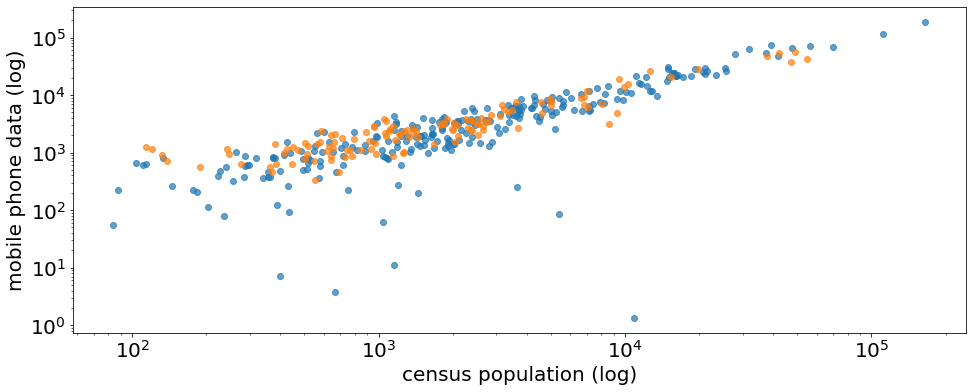

In [63]:
crat0 = dati_corr[dati_corr['Cratere Centro Italia 2016']==0]
crat1 = dati_corr[dati_corr['Cratere Centro Italia 2016']==1]
plt.scatter(crat0['pop_fine_2016'],crat0['media_dopo'],alpha=0.7)
plt.scatter(crat1['pop_fine_2016'],crat1['media_dopo'],alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('census population (log)')
plt.ylabel('mobile phone data (log)')
plt.savefig('images/istat-vs-mobile.pdf',bbox_inches='tight')  
plt.show()

In [64]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
y = dati_corr[['media_dopo']]
x = dati_corr[['pop_fine_2016']]
#x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
Stargazer([model])

In [65]:
variaz = pd.read_csv('quake_data/variaz_phone.csv', sep=',')
medie_prima_dopo = medie_prima_dopo.merge(variaz)
medie_prima_dopo.to_csv('quake_data/variaz_phone_all.csv',index=False)
medie_prima_dopo.head(2)

,Comune,Cratere Centro Italia 2016,media_prima,media_dopo,varPhones,Variaz,Variaz_init,Variaz_end
0,Abbateggio,0.0,490.128191,528.004679,0.077279,-14.463816,0.705066,-19.227151
1,Acciano,0.0,768.136868,819.775802,0.067226,-14.874264,-4.698444,-18.069677


# Compare with Change of Residency

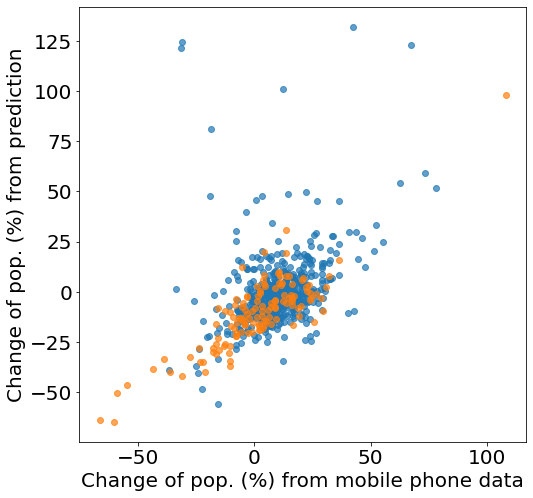

In [66]:
plt.figure(figsize = (8, 8))
crat0 = medie_prima_dopo[medie_prima_dopo['Cratere Centro Italia 2016']==0]
crat1 = medie_prima_dopo[medie_prima_dopo['Cratere Centro Italia 2016']==1]
plt.scatter(crat0['varPhones']*100,crat0['Variaz'],alpha=0.7)
plt.scatter(crat1['varPhones']*100,crat1['Variaz'],alpha=0.7)
plt.xlabel('Change of pop. (%) from mobile phone data')
plt.ylabel('Change of pop. (%) from prediction')
plt.savefig('images/prima-dopo-vs-prediction.pdf',bbox_inches='tight')  
plt.show()

In [67]:
y = medie_prima_dopo[['Variaz']]
x = medie_prima_dopo[['varPhones']]*100
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
Stargazer([model])

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


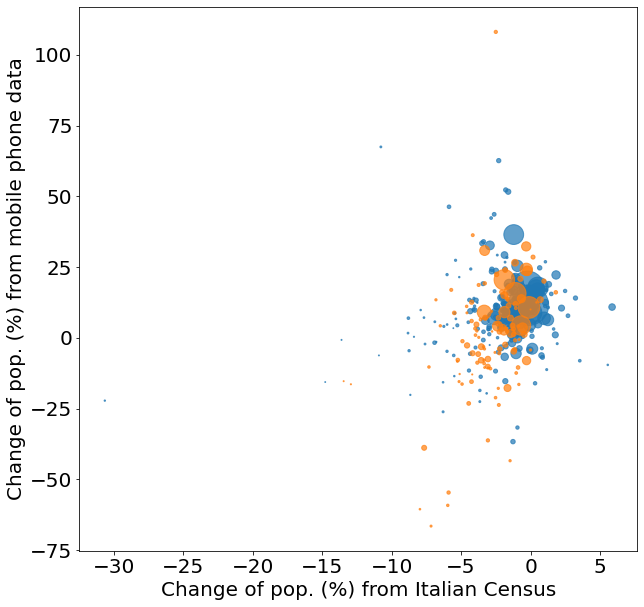

In [68]:
fig = plt.figure(figsize=(10,10))
v = 'var2017all'
'''
for c in ['Amatrice','Camerino','Accumoli']:
    eg = dati_corr[dati_corr['Comune']==c].reset_index()
    plt.scatter(eg[v]*100,eg['varPhones']*100,c='#000000',s=10)
    plt.text(eg[v]*100,eg['varPhones']*100,eg['Comune'][0])
'''

crat0 = dati_corr[dati_corr['Cratere Centro Italia 2016']==0]
crat1 = dati_corr[dati_corr['Cratere Centro Italia 2016']==1]


plt.scatter(crat0[v]*100,crat0['varPhones']*100,alpha=0.7,s=crat0['size'],label='No Cratere')
plt.scatter(crat1[v]*100,crat1['varPhones']*100,alpha=0.7,s=crat1['size'],label='Cratere')
plt.xlabel('Change of pop. (%) from Italian Census',fontsize=20)
plt.ylabel('Change of pop. (%) from mobile phone data',fontsize=20)
#plt.xlim([-6,6])
#plt.ylim([-40,40])
plt.savefig('images/istat-vs-mobile-change.pdf',bbox_inches='tight')  
plt.show()

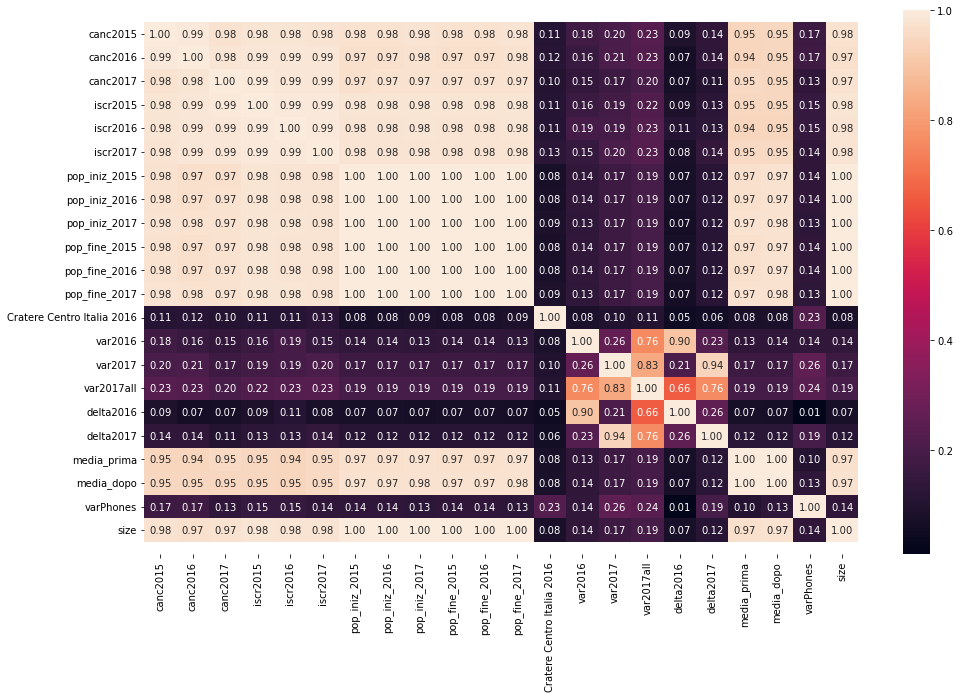

In [69]:
fig = plt.figure(figsize=(16,10))
font = {'size'   : 10}
matplotlib.rc('font', **font)
correlation_mat = abs(dati_corr.corr())
ax = sns.heatmap(correlation_mat, annot = True,fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Riprovo la correlazione con il risultato della predizione

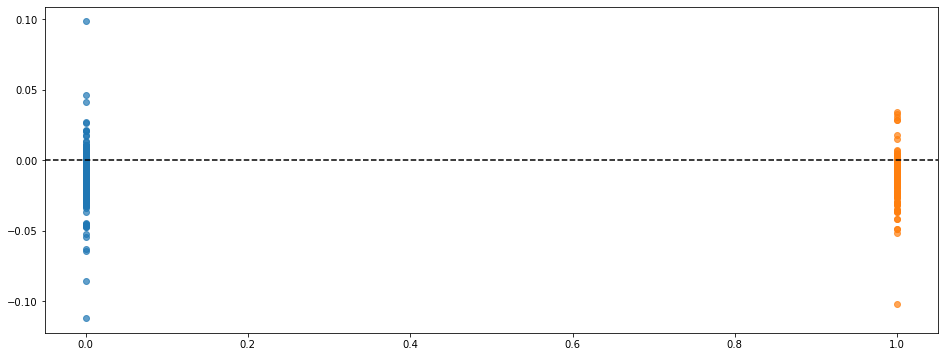

In [70]:
v = 'var2016'
my_crateri = alldata_reshape[['Comune','Cratere Centro Italia 2016',v]]
my_crateri = my_crateri.dropna(axis='rows')
my_crateri = pd.merge(variaz_df2[['Comune','Variaz','size']], my_crateri, how='inner', on='Comune')
my_crateri
crat0 = my_crateri[my_crateri['Cratere Centro Italia 2016']==0]
crat1 = my_crateri[my_crateri['Cratere Centro Italia 2016']==1]
plt.scatter(crat0['Cratere Centro Italia 2016'],crat0[v],alpha=0.7)
plt.scatter(crat1['Cratere Centro Italia 2016'],crat1[v],alpha=0.7)
plt.axhline(y = 0, color = '#000000', linestyle = 'dashed')
plt.show()


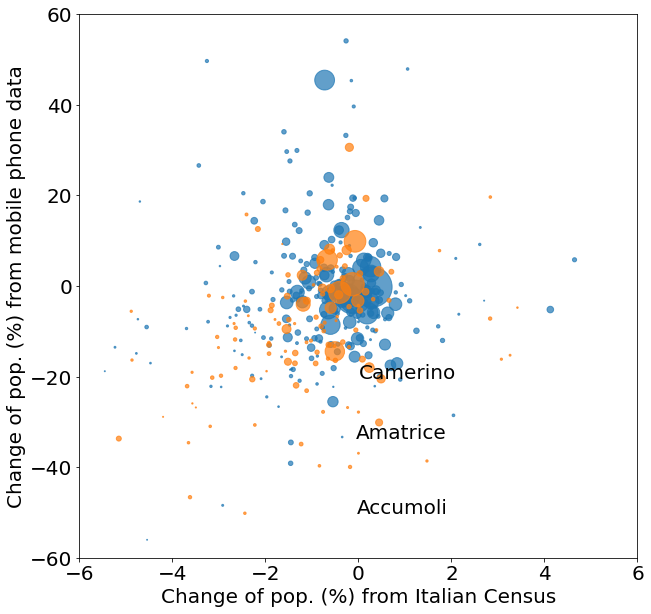

In [26]:
fig = plt.figure(figsize=(10,10))
for c in ['Amatrice','Camerino','Accumoli']:
    eg = my_crateri[my_crateri['Comune']==c].reset_index()
    #plt.scatter(eg[v],eg['Variaz'],c='#000000',s=10)
    plt.text(eg[v],eg['Variaz'],eg['Comune'][0],fontsize=20)

crat0 = my_crateri[my_crateri['Cratere Centro Italia 2016']==0]
crat1 = my_crateri[my_crateri['Cratere Centro Italia 2016']==1]
plt.scatter(crat0[v]*100,crat0['Variaz'],alpha=0.7,s=crat0['size'],label='No Cratere')
plt.scatter(crat1[v]*100,crat1['Variaz'],alpha=0.7,s=crat1['size'],label='Cratere')
plt.xlabel('Change of pop. (%) from Italian Census',fontsize=20)
plt.ylabel('Change of pop. (%) from mobile phone data',fontsize=20)
plt.xlim([-6,6])
plt.ylim([-60,60])
#plt.legend(loc='best')
plt.savefig('images/istat-vs-mobile-change.pdf',bbox_inches='tight')  
plt.show()